<a href="https://colab.research.google.com/github/victorpajot/V_Basic_Raytracer/blob/main/V_Basic_Raytracer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On se sert de numpy pour gerer une tableau de u*v pixels sur n dimensions.

On utilise mattplotlib.pyplot pour afficher ce tableau.

np.full remplit avec la meme value tout le tableau

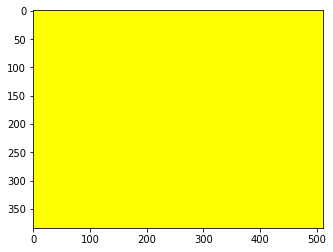

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

def show_image(framebuffer):
    framebuffer_rgb.linear_to_srgb()
    # pour afficher le graphique
    plt.imshow(framebuffer_rgb.im_display_srgb)
    plt.show()

class FrameBuffer():
    '''
    Cet objet va contenir une matrice numpy qui represente les pixels de l'image a rendre
    '''

    def init_random(self):
        self.im = np.random.random(size=(self.height,self.width,self.value_depth))
    
    def init_full(self,value):
        self.im = np.full((self.height,self.width,self.value_depth),value)

    def draft(self, mode = 'full'):
        self.__init__(width=5,height=5)

    def resize(self,width,height):
        self.width = width
        self.height = height
        self.ratio= self.height/self.width

    def linear_to_srgb(self):
        '''
        color management a revoir
        '''
        self.im_display_srgb = self.im*self.im

    def __init__(self, width = 512,height=384, value_depth = 3, mode = 'full'):
        self.width = width
        self.height = height
        self.ratio= self.height/self.width
        self.value_depth = value_depth
        if mode == 'full' :
            self.init_full((1.0,1.0,0))
        if mode == 'random' :
            self.init_random()

framebuffer_rgb = FrameBuffer()
show_image(framebuffer_rgb)

La fonction remap permet de remaper des valeurs sur de nouvelles bornes



In [ ]:
def remap(value,old_min,old_max,new_min,new_max):
    '''
    :param value : float, value from a range to remap
    :param old_min : float, old min value of the range
    :param old_max : float, old max value of the range
    :param new_min : float, min value of the new range
    :param new_max : float, max value of the new range
    return value float
    '''
    new_range = new_max-new_min
    old_range = old_max - old_min
    value = new_min + (value - old_min) * (new_range) / (old_range)
    return value

def test_remap(values=range(0,11),old_min=0,old_max=10,new_min=-1,new_max=1):
    for elem in values :
        print('before remap :',elem)
        result = remap(elem,old_min,old_max,new_min,new_max)
        print('after remap :',result)
 
# test_remap()



La fonction vec3 va permettre de representer notre rayon.
o+z*v

o : origine du rayon

z : la distance dans la profondeur

v : vec3, la direction de notre rayon

La fonction normalize va diviser le vecteur par sa longueur pour qu'il mesure une unitee.

La fonction background color remap entre 0 et 1 pour faire un degrade

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


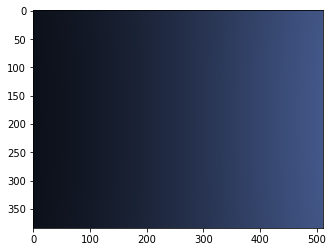

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
 
def vec3(x,y,z):
    '''
    this function will be our simple vector
    :param x : float
    :param y : float
    :param z : float
    return numpy array
    '''
    return np.array((x,y,z))
 
def normalize(v):
    '''
    Divide vector by his length
    :param v : vec3 obj (numpy array)
    :return vec3 - numpy array
    ''' 
    len = math.sqrt(np.dot(v,v))
    return v / len
 
def background_color(v, axis = 1):
    '''
    Remap vector v (axis = 1 = vertical by default) and mult a color with it
    :return vec3 - numpy array
    '''
    # retourne un grade entre 0.05 et 1
    grade = remap(v[axis],-1,1,0.05,1)
    result = grade*vec3(0.7, 0.8, 1)
    return result

class Camera():
    def ray_dir(self,row,column,framebuffer):
        # ajoute 0.5 (pour etre au centre du pixel) et remap entre -1 et 1 
        u = remap(column+0.5,old_min = 0,old_max = framebuffer.width,new_min=-1,new_max=1)
        v = remap(value = row+0.5,old_min = 0,old_max= framebuffer.height,new_min=-1,new_max=1)
        ray_direction = normalize(vec3(u,framebuffer.ratio*(v), -self.window_depth))
        # print(ray_direction)
        return ray_direction

    def __init__(self, ray_origin = vec3(0,0,0)):
        self.ray_origin = ray_origin
        self.window_depth = 2.0



def raytrace(row,column,framebuffer):
    ray_direction = cam.ray_dir(row,column,framebuffer)
    return background_color(ray_direction,0)


def render_image(framebuffer,region=0, outside_color = 0,num_samples=1):
    row_range = range(framebuffer.height)
    column_range = range(framebuffer.width)
    framebuffer_height = framebuffer.height

    if region :
        row_range = row_range[region[1]:region[3]]
        column_range = column_range[region[0]:region[2]]
        framebuffer_height = region[2]
        if outside_color :
            framebuffer.init_full(outside_color)

    for row in row_range:
        if (row % 50 == 0):
            print ('row = ', row)
        for column in column_range:
            acum = vec3(0.0,0.0,0.0)
            for sample in range(num_samples):
                delta =  random.uniform(-0.5,0.5)
                if num_samples == 1:
                    delta = 0
                acum += raytrace(row+delta,column+delta,framebuffer)
            pixel_color = acum/num_samples
            framebuffer.im[framebuffer.height-row-1,column] = pixel_color
    return framebuffer


cam = Camera()
# framebuffer_rgb.resize(100,30)
# framebuffer_rgb = render_image(framebuffer_rgb, region = [100,100,400,400], outside_color = (1.0,1.0,1.0))
framebuffer_rgb = render_image(framebuffer_rgb)
show_image(framebuffer_rgb)

L'equation d'une sphere c'est :
f(x,y,z) = x^2+y2+z^2 = 0

En terme de vecteur ca donne :

dot(p,p)-R^2 = 0

Dans notre cas, l'equation de notre rayon est :

o + z*v

(o = origine du rayon, **z** = nombre de steps dans la profondeur, v = raydir)

Ca donne :

dot(o + z*v,o + z *v)-R^2 = 0

si le centre de la sphere n'est pas a 0, on doit ajouter -c

dot(o + z*v -c ,o + z*v -c)-R^2 = 0


On peut developper cette equation pour obtenir un equation quadratique du type :
a*z^2+b*z+c = 0

ca donne :

(o+zv)^2-2oc-2zvc+c^2 -R^2 = 0

o^2 + 2ozv +z^2v^2  -  2oc-2zvc+c^2 -R^2 = 0

v^2*z^2+   2z*v*o-2z*v*c + o^2-2oc-c^2 = 0

v^2*z^2+  2*v(o-c)*z  +(o-c)^2 = 0

dot(v,v)*z^2 + 2.0*np.dot(o-c,ray_direction)*z +np.dot(o-c,o-c)- radius*radius = 0

a = dot(v,v)

b = 2.0*dot(o-c,ray_direction)

et c = dot(o-c,o-c)-radius*radius

Le discriminant b^2-4*a*c, si il est negatif, indique que l'on a pas touche la sphere



row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


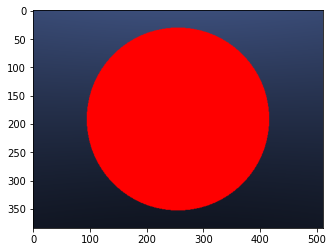

In [ ]:
def hit_sphere(ray_origin, ray_direction, center, radius):
    '''
    Cette fonction retourne le z qui correspond a l'intersection du vecteur avec
    la sphere. On ne rend pas les valeurs negatives car situees derriere la cam.
    :param ray_origin : vec3, origine rayon
    :param ray_direction : vec3, ray direction
    :param center : sphere center
    :param radius : sphere radius
    return z
    '''
    a = np.dot(ray_direction,ray_direction)
    b = 2.0*np.dot(ray_origin-center,ray_direction)
    c = np.dot(ray_origin-center,ray_origin-center)-radius*radius
    discrim = b*b-4*a*c
    if discrim >0 :
        z = (-b-math.sqrt(discrim))/2*a
        if z>0.0001:
        #   print(z)
            return z
        # on est dans la sphere
        z = (-b+math.sqrt(discrim))/2*a
        if z>0.0001:
        #   print(z)
            return z
        else:
            return False
    else:
        return False

class scene_object():

    def create_sphere(self, center, radius):
        self.radius = radius
        self.center = center

    def __init__(self, object_type):
        self.object_type = object_type
        self.shader = False
        

def build_scene_objects():
    all_scene_objects = {}
    sphere_01 = scene_object('sphere')
    sphere_01.create_sphere(center=vec3(0,0,-10), radius=3.0)
    all_scene_objects['sphere_01'] = sphere_01
    return all_scene_objects
    


def raytrace(row,column,framebuffer):
    ray_direction = cam.ray_dir(row,column,framebuffer)
    z_hit = hit_sphere(cam.ray_origin, ray_direction,
                       all_scene_objects['sphere_01'].center, 
                       all_scene_objects['sphere_01'].radius)
    if z_hit:
        return vec3(1,0,0)
    else:
        return background_color( ray_direction )

all_scene_objects = build_scene_objects()
render_image(framebuffer_rgb)
show_image(framebuffer_rgb)


On va sortir le z_hit pour savoir a quelle distance on a rencontre la sphere.
Ensuite on calcul la normal de la surface comme ca :
hit point - center et on normalize ce resultat.
Ce resultat est entre -1 et 1 alors on le remap entre 0 et 1

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


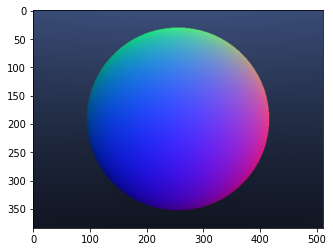

In [ ]:

def raytrace(row,column,framebuffer):
    ray_direction = cam.ray_dir(row,column,framebuffer)
    z_hit = hit_sphere(cam.ray_origin, ray_direction,
                       all_scene_objects['sphere_01'].center, 
                       all_scene_objects['sphere_01'].radius)
    if z_hit:
        hit_point = cam.ray_origin + z_hit*ray_direction
        surface_normal = normalize(hit_point-all_scene_objects['sphere_01'].center)
        return remap(surface_normal,-1,1,0,1)
    else:
        return background_color( ray_direction )

render_image(framebuffer_rgb)
show_image(framebuffer_rgb)

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


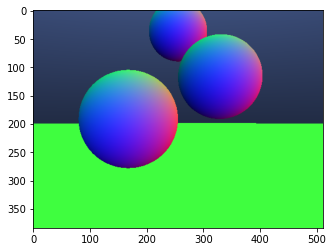

In [ ]:
def hit_sphere_array(ray_origin, ray_direction, all_scene_objects):
  '''
  Cette fonction retourne 
  :param ray_origin : vec3, origine rayon
  :param ray_direction : vec3, ray direction
  :param center : array, spheres center
  :param radius : array, spheres radius
  return z
  '''
  z_min = 9.0e8
  object_found = False
  z_found = False

  for scene_object in all_scene_objects.values():
    z = hit_sphere(ray_origin, ray_direction, scene_object.center, scene_object.radius)
    if z and z<z_min:
      object_found = scene_object
      z_found = z
      z_min=z
  return (object_found,z_found)


def build_scene_objects():
    big_radius = 10000.0
    all_scene_objects = {}
    sphere_01 = scene_object('sphere')
    sphere_01.create_sphere(center=vec3(0.0, 3.0, -10.0), radius=1.0)
    all_scene_objects['sphere_01'] = sphere_01

    sphere_ground = scene_object('sphere')
    sphere_ground.create_sphere(center=vec3(0.0, -big_radius - 1, 0.0), radius=big_radius)
    all_scene_objects['sphere_ground'] = sphere_ground

    sphere_02 = scene_object('sphere')
    sphere_02.create_sphere(center=vec3(1.0, 1.0, -7.0), radius=1.0)
    all_scene_objects['sphere_02'] = sphere_02


    sphere_03 = scene_object('sphere')
    sphere_03.create_sphere(center=vec3(-1.0, 0.0, -6.0), radius=1.0)
    all_scene_objects['sphere_03'] = sphere_03
    return all_scene_objects

def raytrace(row,column,framebuffer):
    ray_direction = cam.ray_dir(row,column,framebuffer)
    (object_found,z_hit) = hit_sphere_array(cam.ray_origin, ray_direction,all_scene_objects)
    if object_found:
        hit_point = cam.ray_origin + z_hit*ray_direction
        surface_normal = normalize(hit_point-object_found.center)
        return remap(surface_normal,-1,1,0,1)
    else:
        return background_color( ray_direction )

all_scene_objects = build_scene_objects()
render_image(framebuffer_rgb)
show_image(framebuffer_rgb)

Ajout reflexion

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


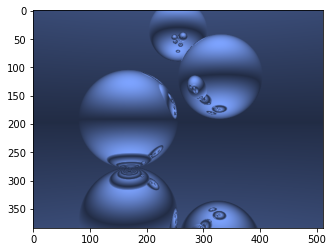

In [ ]:
def reflect(v, n):
    return v - 2.0*np.dot(v,n)*n

max_bounce = 100

def raytrace(row,column,framebuffer):
    bounce=0
    # on stocke l'origine du rayon, pour le premier rayon cest celui de la cam
    ray_origin = cam.ray_origin
    # direction initiale du rayon
    ray_direction = cam.ray_dir(row,column,framebuffer_rgb)
    # tant que l'on est ss le max de bounces
    while bounce<max_bounce:
        # secu
        if bounce == max_bounce-1:
            return vec3(1,1,1)
        # on regarde si on touche quelque chose
        (object_found,z_hit) = hit_sphere_array(ray_origin, ray_direction, all_scene_objects)

        if object_found:
            bounce+=1
            # on stocke le hitpoint
            hit_point = ray_origin + z_hit*ray_direction
            # on calcul la normale du hitpoint
            surface_normal = normalize(hit_point-object_found.center)
            # on calcul l'angle de reflection
            ray_direction = reflect(ray_direction, surface_normal)
            # le nouveau rayon repartira du hit point
            ray_origin = hit_point
        else:
            # si on a rien touche on renvoit le bg
            return background_color( ray_direction )


render_image(framebuffer_rgb)
show_image(framebuffer_rgb)

Ajout emission et absorbtion

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


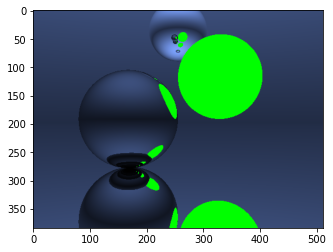

In [ ]:
class Shader():
    def __init__(self, name):
        self.name = name
        self.assigned_objects = []
        self.params = {'emission':(0,0,0)}

def assign_shader():
    shader01 = Shader('shader01')
    shader01.params['absorbtion']=(1,1,1)
    shader01.params['emission']=(0,1,0)
    all_scene_objects['sphere_02'].shader = shader01

    shader02 = Shader('shader02')
    shader02.params['absorbtion']=vec3(0.7,0.7,0.7)
    all_scene_objects['sphere_03'].shader = shader02

    shader03 = Shader('shader03')
    all_scene_objects['sphere_01'].shader = shader03


def process_shader(object_found,energy):
    if object_found.shader:
        shader_found = object_found.shader
        if shader_found.params['emission']!=(0,0,0):
            energy = vec3(0,0,0)
            return energy, shader_found.params['emission']
        if 'absorbtion'in shader_found.params.keys():
            energy*= shader_found.params['absorbtion']
        return energy, False
    else :
        return energy, False


def raytrace(row,column,framebuffer):
    bounce=0
    # on stocke l'origine du rayon, pour le premier rayon cest celui de la cam
    ray_origin = cam.ray_origin
    # direction initiale du rayon
    ray_direction = cam.ray_dir(row,column,framebuffer_rgb)
    energy = vec3(1.0,1.0,1.0)
    # tant que l'on est ss le max de bounces
    while bounce<max_bounce:
        # secu
        if bounce == max_bounce-1:
            return vec3(1,1,1)
        # on regarde si on touche quelque chose
        (object_found,z_hit) = hit_sphere_array(ray_origin, ray_direction, all_scene_objects)

        if object_found:
            bounce+=1
            energy,emission = process_shader(object_found,energy)
            if emission :
                return emission
            # on stocke le hitpoint
            hit_point = ray_origin + z_hit*ray_direction
            # on calcul la normale du hitpoint
            surface_normal = normalize(hit_point-object_found.center)
            # on calcul l'angle de reflection
            ray_direction = reflect(ray_direction, surface_normal)
            # le nouveau rayon repartira du hit point
            ray_origin = hit_point
        else:
            # si on a rien touche on renvoit le bg
            return background_color( ray_direction )*energy

assign_shader()
render_image(framebuffer_rgb)
show_image(framebuffer_rgb)

Ajout refraction

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


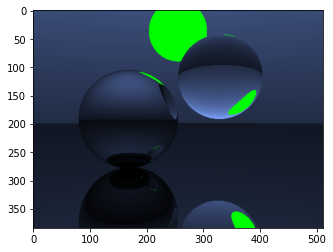

In [ ]:
def assign_shader():
    shader01 = Shader('shader01')
    shader01.params['absorbtion']=(1,1,1)
    shader01.params['emission']=(0,1,0)
    all_scene_objects['sphere_01'].shader = shader01

    shader02 = Shader('shader02')
    # shader02.params['absorbtion']=vec3(0.7,0.7,0.7)
    shader02.params['refraction']=1.5
    all_scene_objects['sphere_02'].shader = shader02

    shader03 = Shader('shader03')
    shader03.params['absorbtion']=(0.7,0.7,0.7)
    all_scene_objects['sphere_03'].shader = shader03

    all_scene_objects['sphere_ground'].shader = shader03

def process_shader(object_found,energy,inside):
    refraction = False
    emission = False
    if object_found.shader:
        shader_found = object_found.shader
        if shader_found.params['emission']!=(0,0,0):
            energy = vec3(0,0,0)
            return energy, shader_found.params['emission'],refraction


        if 'refraction'in shader_found.params.keys():
            if shader_found.params['refraction']!=1.0:
                if not (inside):
                    # on est a lext
                    ni = 1.0
                    nt = shader_found.params['refraction']
                else:
                    # on est a lint
                    ni = shader_found.params['refraction']
                    nt = 1.0
                refraction = [ni,nt]

        if 'absorbtion'in shader_found.params.keys():
            energy*= shader_found.params['absorbtion']

        return energy, emission, refraction
    else :
        return energy, emission, refraction

def refract(v, normal, ni, nt):
        # iors_factor c'est le rapport entre l'ior des 2 mediums
        iors_factor = ni/nt
        cosi = -np.dot(v, normal);
        sint2 = iors_factor*iors_factor*(1-cosi*cosi)
        if (sint2 > 1):
            return (False, v)
        else:
            cost = math.sqrt(1-sint2)
            return (True, iors_factor*v + normal*(iors_factor*cosi-cost))
 
def check_int_ext(ray_direction,surface_normal):
    cos_incident = np.dot(ray_direction,surface_normal)
    if (cos_incident < 0):
        # on est a lext
        inside = 0
    else:
        # on est a lint
        inside = 1
        surface_normal = -surface_normal
    return inside, surface_normal

def raytrace(row,column,framebuffer):
    bounce=0
    # on stocke l'origine du rayon, pour le premier rayon cest celui de la cam
    ray_origin = cam.ray_origin
    # direction initiale du rayon
    ray_direction = cam.ray_dir(row,column,framebuffer_rgb)
    energy = vec3(1.0,1.0,1.0)
    # tant que l'on est ss le max de bounces
    while bounce<max_bounce:
        # secu
        if bounce == max_bounce:
            return vec3(1,1,1)
        # on regarde si on touche quelque chose
        (object_found,z_hit) = hit_sphere_array(ray_origin, ray_direction, all_scene_objects)

        if object_found:
            bounce+=1
            can_refract = False

            # on stocke le hitpoint
            hit_point = ray_origin + z_hit*ray_direction
            # on calcul la normale du hitpoint
            surface_normal = normalize(hit_point-object_found.center)
            # on check si on est a l'int ou l'ext
            inside, surface_normal = check_int_ext(ray_direction,surface_normal)

            energy,emission,refraction = process_shader(object_found,energy,inside)
            if emission :
                return emission
            
            if refraction :
                ni = refraction[0]
                nt = refraction[1]
                (can_refract, refracted_direction) = refract(ray_direction, surface_normal, ni, nt)
            if can_refract :
                ray_direction = refracted_direction 
            else :
                # on calcul l'angle de reflection
                ray_direction = reflect(ray_direction, surface_normal)
            # le nouveau rayon repartira du hit point
            ray_origin = hit_point
        else:
            # si on a rien touche on renvoit le bg
            return background_color( ray_direction )*energy



assign_shader()
render_image(framebuffer_rgb)
show_image(framebuffer_rgb)

row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


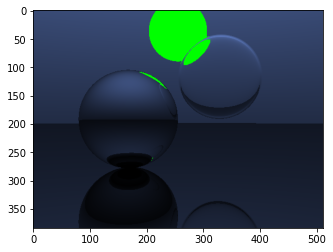

In [ ]:
def build_scene_objects():
    big_radius = 10000.0
    all_scene_objects = {}
    sphere_01 = scene_object('sphere')
    sphere_01.create_sphere(center=vec3(0.0, 3.0, -10.0), radius=1.0)
    all_scene_objects['sphere_01'] = sphere_01

    sphere_ground = scene_object('sphere')
    sphere_ground.create_sphere(center=vec3(0.0, -big_radius - 1, 0.0), radius=big_radius)
    all_scene_objects['sphere_ground'] = sphere_ground

    sphere_02 = scene_object('sphere')
    sphere_02.create_sphere(center=vec3(1.0, 1.0, -7.0), radius=1.0)
    all_scene_objects['sphere_02'] = sphere_02


    sphere_03 = scene_object('sphere')
    sphere_03.create_sphere(center=vec3(-1.0, 0.0, -6.0), radius=1.0)
    all_scene_objects['sphere_03'] = sphere_03

    sphere_inside = scene_object('sphere')
    sphere_inside.create_sphere(center=vec3(1.0, 1.0, -7.0), radius=-0.95)
    all_scene_objects['sphere_inside'] = sphere_inside

    return all_scene_objects

def assign_shader():
    shader01 = Shader('shader01')
    shader01.params['absorbtion']=(1,1,1)
    shader01.params['emission']=(0,1,0)
    all_scene_objects['sphere_01'].shader = shader01

    shader02 = Shader('shader02')
    # shader02.params['absorbtion']=vec3(0.7,0.7,0.7)
    shader02.params['refraction']=1.5
    all_scene_objects['sphere_02'].shader = shader02

    shader03 = Shader('shader03')
    shader03.params['absorbtion']=(0.7,0.7,0.7)
    all_scene_objects['sphere_03'].shader = shader03

    all_scene_objects['sphere_ground'].shader = shader03
    all_scene_objects['sphere_inside'].shader = shader02

def raytrace(row,column,framebuffer):
    bounce=0
    # on stocke l'origine du rayon, pour le premier rayon cest celui de la cam
    ray_origin = cam.ray_origin
    # direction initiale du rayon
    ray_direction = cam.ray_dir(row,column,framebuffer_rgb)
    energy = vec3(1.0,1.0,1.0)
    # tant que l'on est ss le max de bounces
    while bounce<max_bounce:
        # secu
        if bounce == max_bounce:
            return vec3(1,1,1)
        # on regarde si on touche quelque chose
        (object_found,z_hit) = hit_sphere_array(ray_origin, ray_direction, all_scene_objects)

        if object_found:
            bounce+=1
            can_refract = False

            # on stocke le hitpoint
            hit_point = ray_origin + z_hit*ray_direction
            # on calcul la normale du hitpoint
            surface_normal = normalize(hit_point-object_found.center)
            # on prend en compte le radius negatif
            if object_found.radius<0:
                surface_normal = -surface_normal
            # on check si on est a l'int ou l'ext
            inside, surface_normal = check_int_ext(ray_direction,surface_normal)

            energy,emission,refraction = process_shader(object_found,energy,inside)
            if emission :
                return emission
            
            if refraction :
                ni = refraction[0]
                nt = refraction[1]
                (can_refract, refracted_direction) = refract(ray_direction, surface_normal, ni, nt)
            if can_refract :
                ray_direction = refracted_direction 
            else :
                # on calcul l'angle de reflection
                ray_direction = reflect(ray_direction, surface_normal)
            # le nouveau rayon repartira du hit point
            ray_origin = hit_point
        else:
            # si on a rien touche on renvoit le bg
            return background_color( ray_direction )*energy


all_scene_objects = build_scene_objects()
assign_shader()
render_image(framebuffer_rgb)
show_image(framebuffer_rgb)


row =  0
row =  50
row =  100
row =  150
row =  200
row =  250
row =  300
row =  350


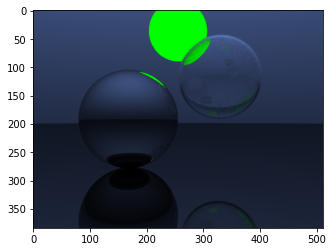

In [ ]:

def glass_fresnel(c):
    c5 = math.pow(1-c, 5)
    return 0.05*(1-c5) + 0.95*c5


def raytrace(row,column,framebuffer):
    bounce=0
    # on stocke l'origine du rayon, pour le premier rayon cest celui de la cam
    ray_origin = cam.ray_origin
    # direction initiale du rayon
    ray_direction = cam.ray_dir(row,column,framebuffer_rgb)
    energy = vec3(1.0,1.0,1.0)
    # tant que l'on est ss le max de bounces
    while bounce<max_bounce:
        # secu
        if bounce == max_bounce:
            return vec3(1,1,1)
        # on regarde si on touche quelque chose
        (object_found,z_hit) = hit_sphere_array(ray_origin, ray_direction, all_scene_objects)

        if object_found:
            bounce+=1
            can_refract = False

            # on stocke le hitpoint
            hit_point = ray_origin + z_hit*ray_direction
            # on calcul la normale du hitpoint
            surface_normal = normalize(hit_point-object_found.center)
            # on prend en compte le radius negatif
            if object_found.radius<0:
                surface_normal = -surface_normal
            # on check si on est a l'int ou l'ext
            inside, surface_normal = check_int_ext(ray_direction,surface_normal)

            energy,emission,refraction = process_shader(object_found,energy,inside)
            if emission :
                return emission
            
            if refraction :
                ni = refraction[0]
                nt = refraction[1]
                (can_refract, refracted_direction) = refract(ray_direction, surface_normal, ni, nt)
            if can_refract :
                cosine1 = abs(np.dot(ray_direction,surface_normal))
                cosine2 = abs(np.dot(refracted_direction, surface_normal))
                cosine = min(cosine1,cosine2)
                prob_reflect = glass_fresnel(cosine)
                if (random.uniform(0.0,1.0) < prob_reflect):
                    ray_direction = reflect(ray_direction, surface_normal)
                else:
                    ray_direction = refracted_direction

            else :
                # on calcul l'angle de reflection
                ray_direction = reflect(ray_direction, surface_normal)
            # le nouveau rayon repartira du hit point
            ray_origin = hit_point
        else:
            # si on a rien touche on renvoit le bg
            return background_color( ray_direction )*energy


render_image(framebuffer_rgb,num_samples=30)
show_image(framebuffer_rgb)

